# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [161]:
import numpy
import pandas as pd
import matplotlib

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [162]:
df = pd.read_csv('../data/states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [163]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)
df["ENROLL_ALL_EST"] = df["ENROLL_ALL_EST"].fillna(df["ENROLL_ALL"])
df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ENROLL_ALL']

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: Grade 8 Math

How many years of data are logged in our dataset? 

In [164]:
print(df["YEAR"].unique())
print(df["YEAR"].nunique())

[1992 2000 2003 2005 2007 2009 2011 2013 2015 1990 2017 1996 2019]
13


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [165]:
states = df.groupby("STATE")
michigan = states.get_group("MICHIGAN")
michiganMath8 = michigan["AVG_MATH_8_SCORE"]
ohio = states.get_group("OHIO")
ohioMath8 = ohio["AVG_MATH_8_SCORE"]

michiganAverage = michiganMath8.mean()
ohioAverage = ohioMath8.mean()

if(michiganAverage > ohioAverage):
    print("Michigan")
else:
    print("Ohio")

Ohio


Find the average for your outcome score across all states in 2019

In [166]:
avgMath = df.groupby(["YEAR", "STATE"])["AVG_MATH_8_SCORE"]
type(avgMath)

yearState = df[["YEAR", "STATE", "AVG_MATH_8_SCORE"]]
yearSt = yearState[yearState["YEAR"] == 2019]["AVG_MATH_8_SCORE"].mean()
yearSt
#get2019Data = states.get_group(2019)
#get2019Data["AVG_MATH_8_SCORE"].mean()


281.2641509433962

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [167]:
df.groupby(["YEAR", "STATE"])["AVG_MATH_8_SCORE"].max()

YEAR  STATE        
1990  ALABAMA          253.0
      ARIZONA          260.0
      ARKANSAS         256.0
      CALIFORNIA       256.0
      COLORADO         267.0
                       ...  
2019  VIRGINIA         287.0
      WASHINGTON       286.0
      WEST_VIRGINIA    272.0
      WISCONSIN        289.0
      WYOMING          286.0
Name: AVG_MATH_8_SCORE, Length: 602, dtype: float64

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [168]:
df['TOTAL_EXPENDITURE_PER_STUDENT'] = df['TOTAL_EXPENDITURE'] / df['ENROLL_ALL']
df['TOTAL_REVENUE_PER_YEAR'] = df['TOTAL_REVENUE'] / df['YEAR']

Feature engineering justification: I expect that the higher overall expenditure, the higher the average scores

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, 'Average Math 8 Scores')

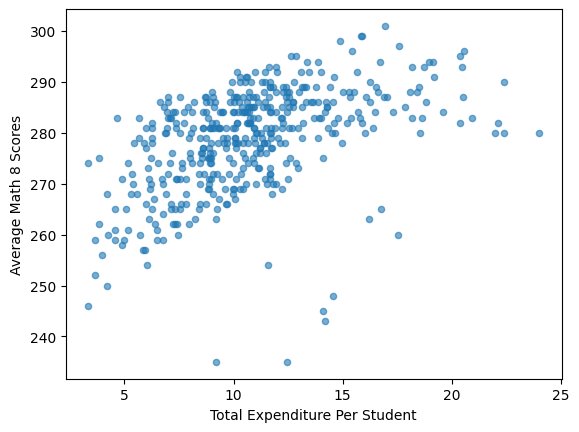

In [169]:
import matplotlib.pyplot as plt
df.plot.scatter(x='TOTAL_EXPENDITURE_PER_STUDENT', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('Total Expenditure Per Student')
plt.ylabel('Average Math 8 Scores')

There appears to be a slight linear trend that increased levels of expenditure per student is corralated with higher math 8 scores.

**Visualization 2**

Text(0, 0.5, 'Average Math 8 Scores')

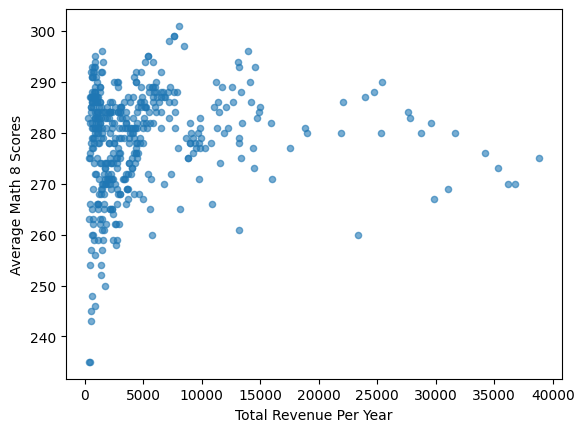

In [170]:
df.plot.scatter(x='TOTAL_REVENUE_PER_YEAR', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('Total Revenue Per Year')
plt.ylabel('Average Math 8 Scores')

There appears to be a meager association between total revenue and average 8th grade math scores. However there is a significant amount of outliers that may be interesting to investigate.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [171]:
from sklearn.model_selection import train_test_split

X = df[['TOTAL_EXPENDITURE_PER_STUDENT','TOTAL_REVENUE_PER_YEAR']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']

y.fillna(y.median(), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [172]:
from sklearn.linear_model import LinearRegression

In [173]:
model = LinearRegression()

In [174]:
model.fit(X_train, y_train)

LinearRegression()

In [175]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [176]:
import numpy as np
meanError = np.mean(model.predict(X_test)-y_test)
rootMeanError = np.mean((model.predict(X_test)-y_test)**2)**0.5
rSquared = model.score(X_test, y_test)

print(meanError, rootMeanError, rSquared)

0.771276464593518 10.014596572475536 0.24672303267215812


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

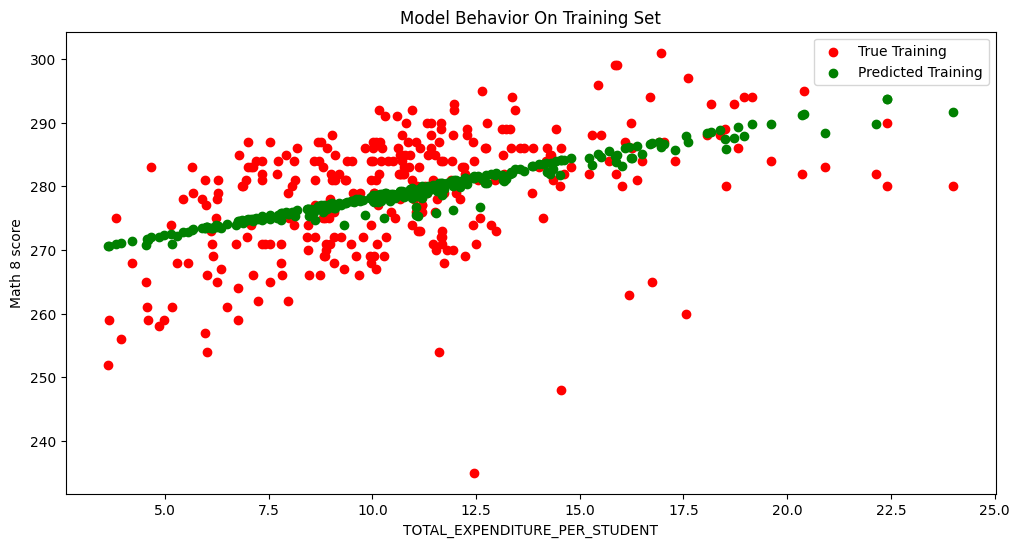

In [177]:
col_name = 'TOTAL_EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Math 8 score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

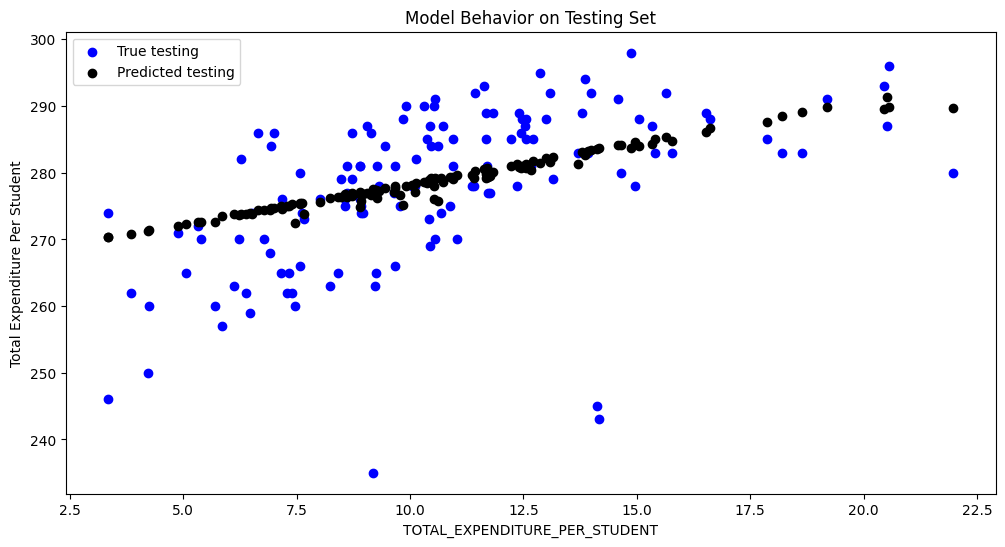

In [178]:
col_name = 'TOTAL_EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Total Expenditure Per Student')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

From my analysis of both response variables, the model is a poor perdictor of the dataset due to immense amount of variation in the average 8th grade math scores. The R^2 value is 0.24672303267215812, which means that only ~25% of the variation in 8th Grade Math scores can be explained by the variables total expenditure per student and total revenue per year. 

However poorly the model may account for the variation in the data, it does accurately show that there is a somewhat strong correlation between 8th Math scores and the response variables.